In [22]:
import json
from tqdm import tqdm
from pathlib import Path
import sys
import csv
import os
from collections import defaultdict, Counter
import ast
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib


NameError: name 'self' is not defined

In [14]:
with open('../datasets/personality_captions/test.json') as f:
    gt = {x['image_hash'] : x for x in json.load(f)}

with open('../exp1-checkpoint-29-43650/pred.personality_captions.test.beam5.max20.odlabels_coco_format.json') as f:
    result = json.load(f)

In [32]:
def difference(i):
    image_id, pred_caption = result[i].values()
    actual_caption = gt[image_id]['comment']
    personality = gt[image_id]['personality']
    img = mpimg.imread(f'../datasets/yfcc_images/{image_id}.jpg')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    print(f"Personality: {personality}\n\nActual: {actual_caption}\n\nGenerated: {pred_caption}\n ")

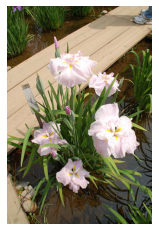

Personality: Romantic

Actual: Ahh spring has sprung, so beautiful I should give these to a fine lass.

Generated: these flowers are so beautiful, i would love to have them in my garden.
 


In [77]:
difference(8400)

In [5]:
with open('../datasets/personality_captions/train.json') as f:
    gt = json.load(f)

In [6]:
with open('../datasets/personality_captions/personalities.json') as f:
    p = json.load(f)

In [8]:
positive = 0
neutral = 0
negative = 0 
for x in gt:
    if x['personality'] in p['positive']:
        positive += 1
    elif x['personality'] in p['negative']:
        negative += 1
    elif x['personality'] in p['neutral']:
        neutral += 1

print(positive, negative, neutral)

58056 65872 25063


In [10]:
positive/ (positive+neutral+negative)
negative/ (positive+neutral+negative)

0.4421206650066111